# Datenqualität beurteilen, Daten bereinigen und ergänzen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Eingangs-Daten für die Analyse aus Messungen und Recherchen überprüfen </li>
        <li> Daten plausibel und transparent bereinigen </li>
        <li> Normen als Quelle von Anforderungen nutzen </li>
        <li> Energiedaten selbst erzeugen anhand von Annahmen </li>
        <li> Ergebnisse überprüfen (ist so viel Energieeinsparung plausibel?) </li>
    </ul>
</div>

## Kriterien für Datenqualität in Datensätzen

*Daten von niedriger Qualität sind in kommerziellen und wissenschaftlichen Datenbanken **allgegenwärtig**. Produktcodes werden falsch verwendet, Messreihen werden in unterschiedlichen Einheiten erfasst, Kundendaten werden in Call-Centers fehlerhaft eingetippt etc. Solche Datenfehler und Probleme mindern die Datenqualität und haben wirtschaftliche Konsequenzen: Es gilt das sogenannte **garbage-in-garbage-out** Prinzip. Fehler in den Daten verursachen Fehler in daraus generierten Berichten; mangelndes Vertrauen in Daten führt zu Fehlentscheidungen; Chancen werden verpasst wenn Daten verspätet oder unverständlich sind.* {cite:p}`informatik_gi_datenqualitat_2018`

### Datenqualität: Struktureller Überblick

nach {cite:p}`rahm_data_2000`:

![Struktur der Datenqualität](../img/datenqualitaet.png)

weitere wichtige Aspekte von Datenquelle(n):
- Verständlichkeit
- Vollständigkeit
- Reputation

### Messbare Kriterien für Datenqualität

nach {cite:p}`informatik_gi_datenqualitat_2018`:
- viele Kriterien sind qualitativ, z. B. Reputation
- **Vollständigkeit**: z. B. 44% bei OMIM, d.h. Infos über 10.995 der geschätzten 25.000 menschlichen Gene
- **Genauigkeit**: z. B. stichprobenartige Überprüfung der Messgenauigkeit einzelner Datensätze oder -punkte
- **möglichst (automatisiert) eliminieren**: Dubletten und klar unplausible Daten (z. B. durch Überprüfung der Maximalwerte oder Minimalwerte)

### Externe Daten im Nachhinein verbessern

kann man nicht!

einzige Möglichkeit (nach {cite:p}`informatik_gi_datenqualitat_2018`): bewusst mit den Daten und ihrer Qualität umgehen, sonst Gefahr falscher Entscheidungen
- geeignete Darstellung, z. B. Zahl der gültigen Ziffern: nicht "80.068.011 Einwohner", sondern "80 Mio."
- Angabe von (ggf. abgeschätzten) Unsicherheitsfaktoren und deren Größe, z. B. "1,16 kWh pro Waschgang im Programm 60°C, je nach Füllgrad $\pm$0,15 kWh"

## Fehlerhafte Daten bereinigen

### Datenqualität: eigene oder aus externen Daten selbst zusammengefasste Daten bereinigen

![Datenentstehungskette kritisch betrachten](../img/datenentstehungskette.png)

**am wirkungsvollsten**: Integritätsbedingungen formulieren (z. B. max. Leistung eines Gerätes) oder Konsistenz von Datensätzen sicherstellen (z. B. Energieerhaltung)

**häufig genutzt (transparent dokumentieren!)**: fehlende Werte so ergänzen, dass statistische Größen wie Durchschnitt oder Standardabweichung unverändert bleiben sowie Ausreißer (= wahrscheinliche Datenfehler) erkennen und eliminieren

nach {cite:p}`informatik_gi_datenqualitat_2018`

### Beispiel für Ersetzen / Eliminieren von fehlerhaften / fehlenden Daten bei der Waschmaschinenmessung

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie kann die fehlerhafte Waschmaschinenmessung aus dem vorigen Abschnitt bereinigt werden?
</div>

*Antwort:...*

### Mit Mittelwert auffüllen

Mittelwert $\bar{x(t)}$ über Zeitintervall $t_1$ bis $t_2$:

\begin{equation}
\bar{x(t)} = \frac{1}{t_2 - t_1} \int_{t_1}^{t_2} x(t)dt
\end{equation}

das wird bei diskreten Messwerten zu einer Summenformel:

\begin{equation}
\bar{x(t)} = \frac{1}{i(t_2) - i(t_1) + 1} \sum_{i(t_1)}^{i(t_2)} x(t_i)
\end{equation}

Beispielwerte:

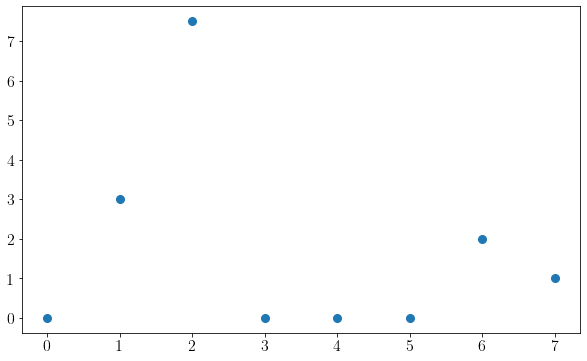

In [10]:
x = [0.0, 3,7.5, 0, 0,0,2.0, 1.0]
plt.plot(x,'o')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Berechnen Sie, mit welchen Werten die Nullen interpoliert werden könnten.
</div>

*Antwort: Der Mittelwert zwischen $t_1$ und $t_2$ beträgt ...*

<AxesSubplot:>

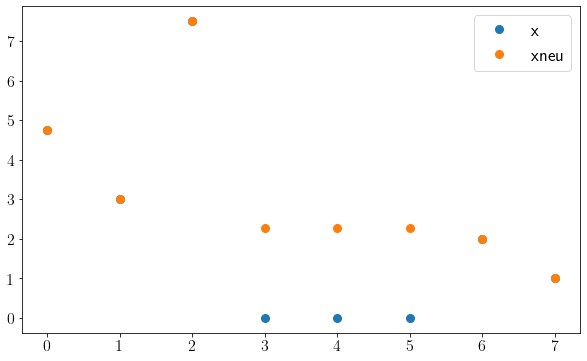

In [27]:
df = pd.DataFrame(data = x, columns = ['x'])
df['xneu']=df.mask(df==0).fillna(df.mean())
df.plot(marker='o', linestyle = 'none')

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Wichtig:</b></div>
<b>Datenkorrekturen immer begründen und dokumentieren! </b>Begründung für Waschmaschine z. B.: Energiesumme bei 1,16 kWh.
   
</div>

### Linear interpolieren

Hierbei wird angenommen, dass die Daten in dem fehlerhaften Segment von $x_a$ bis $x_b$ auf einer Gerade zwischen dem beiden umschließenden korrekten Punkten liegen. Dies geschieht gemäß der folgenden Formel:

\begin{equation}
y = y(x_a)+ \frac{y(x_b)-y(x_a)}{x_b-x_a} \cdot (x -x_{a})
\end{equation}

Hierfür bietet pandas bereits die Methode `interpolate` an (siehe [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html?highlight=interpolate#pandas.DataFrame.interpolate)).

<AxesSubplot:>

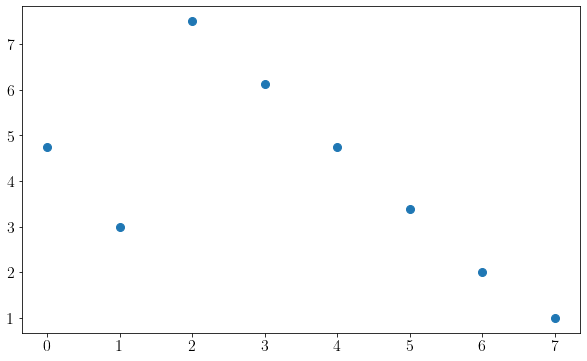

In [31]:
df = pd.DataFrame(data = x, columns = ['x'])
df.loc[df['x'] == 0 ] = np.nan
df['xneu'] = df.interpolate(method='linear', limit_direction='forward', axis=0)
df['xneu'].plot(marker='o', linestyle = 'none')

### Zufallszahlen hinzufügen

1. Schwankungsbreite festlegen, z. B. 9,279 A bis 9,553 A aus daneben liegenden Messdaten
2. Auflösung festlegen, z. B. 0,004 A als kleinsten Abstand zwischen den gemessenen Stromwerten
3. Verteilung festlegen, z. B. Gleichverteilung oder Normalverteilung

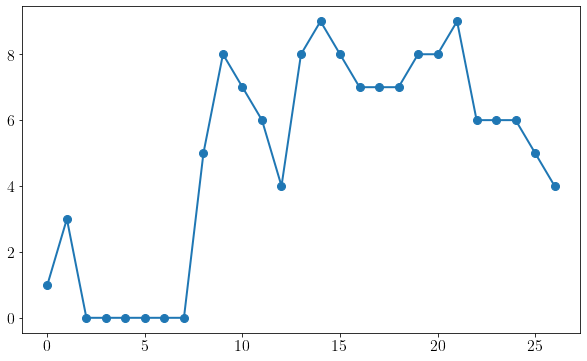

In [32]:
# neue Beispielwerte
x = np.array([1,3,0,0,0,0,0,0,5,8,7,6,4,8,9,8,7,7,7,8,8,9,6,6,6,5,4])
plt.plot(x,'o-')

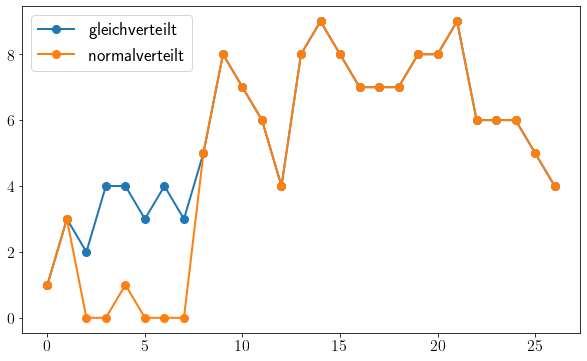

In [34]:
y = np.array([1,3,0,0,0,0,0,0,5,8,7,6,4,8,9,8,7,7,7,8,8,9,6,6,6,5,4])
x[x < 1 ] = 5*np.random.rand(len(x[x<1])) # gleichverteilte Werte - von 0 bis 1
y[y < 1 ] = 1*np.random.randn(len(y[y<1])) # normalverteilte Werte - von .. bis .. 
plt.plot(x,'o-',label='gleichverteilt')
plt.plot(y,'o-',label='normalverteilt')
plt.legend(loc='best')

## Wissenschaftliches Fehlverhalten

**Wichtig**: Bereinigung transparent machen<br><br>
Erfundene Daten, die nicht ordnungsgemäß gekennzeichnet waren, haben schon
wissenschaftliche Karrieren zerstört, siehe die Geschichte eines Physikers namens [Jan Hendrik Schön](https://de.wikipedia.org/w/index.php?title=Jan_Hendrik_Sch%C3%B6n&stableid=201319209) {cite:p}`wikipedia_jan_2018`, der seinem Namen alle Ehre machte und Messdaten geschönt hat.

Zudem sind erfundene Daten eine schlechte Entscheidungsgrundlage: 
- auch und besonders erfundene Daten können unplausibel sein und somit zu Fehleinschätzungen führen
- wenn aufgrund fehlerhafter Daten eine Investition getätigt wird, dann ist das Geld oft verloren

Hier im Master sind erfundene Daten, die nicht ordnungsgemäß gekennzeichnet sind, wissenschaftliches Fehlverhalten, im Extremfall eine Note 5,0.

Daten abschätzen und Messdaten bereinigen sind wichtige Aufgaben Ihrer Arbeit. Machen Sie Ihre Annahmen hierfür transparent!

## Messungen und Messdaten kritisch betrachten

![Einfache Darstellung der Messkette](../img/messkettediagramm.png)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Finden Sie Beispiele für Messfehler an den verschiedenen Stellen der Messkette:
</div>

*Antwort:...*

Typische weitere Beispiele: 
- ungünstige Plazierung des Sensors, z. B. Temperatursensor in der Sonne (Störsignal)
- Sensor kaputt: z. B. erhöhter Kontaktwiderstand
- Sensor nicht verbunden, z. B. Leitung defekt
- Digitalisierung mit zu niedriger Frequenz oder zu geringer Auflösung
- elektromagnetische Einkopplung in Sensorleitung führt zu verfälschten Werten

### Datenqualität bei Messdaten: Beispiel einer Temperaturmessung

In [35]:
temperatur = pd.DataFrame()
temperatur['Zeit [s]'] = [1,2,3,4,5]
temperatur['Temperatur [°C]'] = [20.185,21.185,21.185,20.685,20.185]
#temperatur.head()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ist die Anzahl der Nachkommastellen sinnvoll? Wann wird gerundet - schon bei der Datengrundlage oder erst bei der Darstellung?
</div>

*Antwort:...*

Auflösung dieses Sensorsignals: 0,5°C $\to$ in Darstellungen max. 1 Nachkommastelle sinnvoll

## Neue Profile aus gemessenen Daten zusammenstellen

Um die Testdaten des Energieloggers gleich nutzen zu können, verwenden wir eine Funktion zum Einlesen eines Projektes aus 2019 {cite:p}`maximilian_augsdorfer_projektdokumentation_2019`:

In [52]:
def read_energy_logger_file(path_to_file):

    # Check if path exists
    if not os.path.exists(path_to_file) or not os.path.isfile(path_to_file):
        raise Exception("No file at given path!")
        
    # Read data into pandas dataframe
    df = pd.read_csv(path_to_file, header = 7)

    # Rename columns
    df = df.rename(columns = {"Aufnahmezeit": "timestamp", "Stromstärke (A)": "Current [A]", "Wirkleistung (W)": "Active Power [W]", "Scheinleistung (W)": "Apparent Power [W]"})

    # Since the data provided by the energy logger
    # is not formated correctly for further usage,
    # each cell needs to be reformated.

    # Iterate through dataframe and reformat data
    for index, row in df.iterrows():
        
        # Reformat other columns
        for column in df.columns:
            if not column == "timestamp":
                
                # Get string from cell
                string = row[column].replace(",", ".")

                # Create float from string
                value = float(string)
                
                # Set reformated cell
                row[column] = value

    # Cast data types to float 64
    for column in df.columns:
        if not column == "timestamp":
            df = df.astype({column: 'float64'})
            
            
    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y %H:%M:%S"))

    return df

Um ein kurzes Lastprofil für ein ganzes Jahr zu verschiedenen Zeitpunkten zu verwenden, benötigt man eine Funktion, die dieses Lastprofil auf andere Zeitpunkte kopiert. Ein Projekt hat so eine Funktion in 2019/2020 folgendermaßen gelöst {cite:p}`maximilian_augsdorfer_projektdokumentation_2019`:  Der erste Zeitstempel ist `start_timestamp_string`. Danach wird der Zeitstempel der weiteren Datenreihen um jeweils den in dem Parameter `resolution` übergebenen Wert erhöht. Die Funktion gibt einen angepassten `DataFrame` mit den neuen Zeitstempeln zurück.

In [53]:
def map_timestamp(df, start_timestamp_string, resolution = 1, column_name = "timestamp"):
    
    # Create datetime object from start timestamp
    start_timestamp = dt.datetime.strptime(start_timestamp_string, "%d-%m-%Y %H:%M:%S")
    
    timestamps = []
    
    # Iterate through data frame rows
    for idx, row in df.iterrows():
        
        # Create mapped timestamp
        mapped_timestamp = start_timestamp + dt.timedelta(minutes = len(timestamps) * resolution)
        
        # Append timestamp
        timestamps.append(mapped_timestamp)
        
    
    df[column_name] = timestamps
    
    
    # Return mapped data frame
    return df

Dasselbe Projekt hat auch eine Funktion zur Erstellung eines Zeitraums ohne oder mit konstanter Last geschrieben {cite:p}`maximilian_augsdorfer_projektdokumentation_2019`: Der Parameter `size` gibt an, wie viele aufeinander folgende Reihen mit jeweils dem gleichen Zahlenwert (`value`) erzeugt werden sollen. Die Funktion bezieht sich immer auf einen Tageszeitraum. D.h. das damit erzeugte Profil muss dann mithilfe der obigen Funktion `map_timestamp` wieder vervielfältigt werden.

In [54]:
def create_uniform_dataframe(size, value):
    values = []
    
    for i in range(0, size):
        values.append(value)
    
    timestamps = ["01-01-2019 00:00:00" for x in range(size)]

    df = pd.DataFrame()
    
    df["timestamp"] = timestamps
    df["Current [A]"] = values
    df["Active Power [W]"] = values
    df["Apparent Power [W]"] = values

    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%d-%m-%Y %H:%M:%S"))

    return df

Um nun mehrere DataFrames zusammenzufügen zu einem einzigen DataFrame, der dann sowohl synthetisch generierte als auch gemessene Daten erhält, schlägt das Projekt zudem noch die Nutzung des `concat`-Befehls vor {cite:p}`maximilian_augsdorfer_projektdokumentation_2019`: Zunächst passt die Funktion den Zeitstempel der einzelnen DataFrames an und setzt dafür die obige Funktion `map_timestamp` ein. Der Übergabe-Parameter `dfs` enthält ein Array mit Tupeln: Der erste Index eines jeden Tupels ist der `DataFrame`, der die Daten enthält. Der zweite Index ist ein `String`, der den Start-Zeitstempel beinhaltet. So ist es möglich, eine kürzere Messreihe mehrfach hintereinander zu hängen, ohne dass Inkonsistenzen bei den Zeitstempeln auftreten.

In [55]:
def concat_data(dfs):
    
    # dfs in tuple-format: (dataFrame, startTimestamp)
    
    # Prepare data frames
    dfsToConcat = []
    
    # Set timestamps
    for df in dfs:
        mapped_df = map_timestamp(df[0], df[1])
        dfsToConcat.append(mapped_df.copy())
        
    return pd.concat(dfsToConcat)

In [56]:
def timestamp_based_concat(df, start_timestamp_string, number_of_concats, offset):
    result = []
    
    # Create datetime object from start timestamp
    start_timestamp = dt.datetime.strptime(start_timestamp_string, "%d-%m-%Y %H:%M:%S")

    for i in range(0, number_of_concats):
        
        timestamp = start_timestamp + dt.timedelta(minutes = offset * i)
        timestamp_string = timestamp.strftime("%d-%m-%Y %H:%M:%S")
        
        result.append((df.copy(), timestamp_string))
        
    return result

Nun ein Beispiel mit den Testdaten einer Energieloggermessung:

In [57]:
# einlesen und Variablen vorbereiten
testdaten = read_energy_logger_file('../data/Energieloggertestdaten.csv')
standbydf = create_uniform_dataframe(30,.5)
jahresenergie = {}
# Tag erstellen
testdaten_fd_dfs = timestamp_based_concat(standbydf, "03-01-2021 00:00:00", 16, 30)
testdaten_fd_dfs.extend(timestamp_based_concat(testdaten, "03-01-2021 08:00:00", 16, 30))
testdaten_fd_dfs.extend(timestamp_based_concat(standbydf, "03-01-2021 16:00:00", 16, 30))
testdaten_fd = concat_data(testdaten_fd_dfs)
#testdaten_fd.head()

timestamp  Current [A]  Active Power [W]  Apparent Power [W]
0 2021-01-03 00:00:00          0.5               0.5                 0.5
1 2021-01-03 00:01:00          0.5               0.5                 0.5
2 2021-01-03 00:02:00          0.5               0.5                 0.5
3 2021-01-03 00:03:00          0.5               0.5                 0.5
4 2021-01-03 00:04:00          0.5               0.5                 0.5

<AxesSubplot:xlabel='timestamp'>

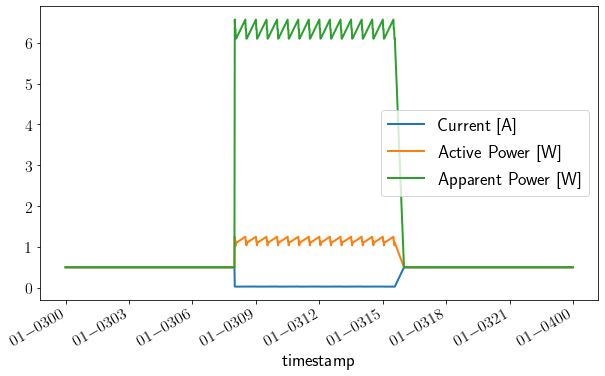

In [58]:
testdaten_fd.plot(x='timestamp')

## Energieströme und zugehörige Messgrößen 
(nach {cite:p}`hesselbach_energie-_2012`)

| **Energiestrom** | **Formelbeschreibung** | **Messgröße(n)** | **Bemerkung** |
|-|-|-|-|
| Elektrische Wirkleistung $P$ | $P = S\cdot \lambda$ | $u(t)$, $i(t)$ | häufig integrierte Messgeräte |
| Lichtleistung | $E_\nu = d\Phi_\nu / dA$ | Beleuchtungsstärke (lux), W/m² | sichtbar $E_\nu \neq E_{ges}$ |
| Druckluft | $P_{\text{DL}} = \dot{V}\cdot p_{\text{DL}}$ | $\dot{V}$, $p_{\text{DL}}$ | Normbedingungen |   
| Hydraulik | $P_{\text{Hy}} = \dot{V}\cdot p_{\text{Hy}}$ | $\dot{V}$, $p_{\text{Hy}}$ | ` ` |   
| Wärme (Konvektion) | $\dot{q_{\text{conv}}} = \alpha_{\text{conv}} \cdot (T_{\text{Wand}} - T_{\text{Umgebung}})$ | $T_{\text{Wand}}$, $T_{\text{Umgebung}}$ | $\alpha$ aus Tabellen oder Nebenrechnungen | 
| Wärme (Durchgang) | $\dot{q} = U_{\text{th}} \cdot (T_i - T_a)$ | $T_i$, $T_a$ | $U_{\text{th}}$ aus Tabellen oder Nebenrechnungen |
| Wärme (Strahlung) | $\dot{q_{\text{rad,12}}} = \sigma_{12} \cdot (T_1^4 - T_2^4)$ | $T_1$, $T_2$ | $\sigma_{12}$ aus Kalibriermessungen | 
| Wärme (Enthalpiestrom) | $\dot{q_h} = \dot{m_c}\cdot(T_{\text{ein}} - T_{\text{aus}})$ | $\dot{m}$, $T_\text{ein}$, $T_{\text{aus}}$ | Wärmekapazitäten $c$ aus Tabellen |
| Wärme (Verbrennung) | $\dot{q} = \eta_{\text{WE}}\cdot\dot{m_{\text{Brennst}}}\cdot\Delta h_{\text{u,Brennst}}$ | $\dot{m_{\text{Brennst}}}$ | Verbrennungsenthalpie aus Tabellen |
| Wärme (Phasenübergang) | $\dot{q_{\text{12,rev}}}\approx\dot{m}\cdot r_D$ | $\dot{m}$ | Enthalpie aus Tabellen |

## Energiedaten aus Top-Down und Bottom-Up-Analysen ergänzen

nach {cite:p}`hesselbach_energie-_2012`

![Quellen für Energiedaten](../img/energiedatenquellen.png)

### Energiedaten Top-Down analysieren: vom Gesamtverbrauch auf den Einzelverbrauch schließen

- Produktionsbetriebe: Protokolle der Energieversorger
 - ab 100 MWh Stromverbrauch mit 15 Minuten Auflösung
 - ab 1,5 Mio. kWh Erdgasverbrauch mit 1 Stunde Auflösung
- Analyse von
 - Gesamtverbrauch (auch im Vergleich)
 - Verbrauchsmuster (Jahr, Monat, Woche, Tag)
 - Maximale, minimale und Durchschnittslast
 - bei zu bestehenden Anlagen: Produktionsdaten (indirekte Info)
 - bei zu planenden Systemen: Vergleichssysteme, Überschlagsrechnungen, Simulationen

### Nutzen von Top-Down-Daten: Iteratives Vorgehen bei der Analyse

![Iteratives Vorgehen bei der Analyse von Top-Down-Daten](../img/topdowndatenanalyseiterieren.png)

### Bottom-Up-Analyse: Typenschilder zählen

- auf Typenschildern von Maschinen, Anlagen, Geräten findet sich die Nennleistung
 - Problem 1: Welche Geräte benötigen die ganze Zeit die Nennleistung?
 - Problem 2: Ist die Nennleistung die maximale Last, die Dauerlast (für welche Dauer) und wie viel Überlast fällt an?
 - Problem 3: Nach welcher Größe werden elektrische Betriebsmittel (Leitungen, Sicherungen, Transformatoren, etc.) ausgelegt?
- Systematische Überdimensionierung von elektrischen Betriebsmitteln: Addition aller Nennleistungen plus Sicherheitszuschlag jeweils auf Planungsebene (20-30%)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welchen Nutzen haben Leistungsangaben für die Energieeffizienzanalyse? Diskutieren Sie in Kleingruppen.
</div>

*Antwort: ...*

### ABC-Analyse von Verbrauchern

- relative Sortierung anhand von Typenschildangaben
- A: Großverbraucher: möglichst einzeln erfassen und auswerten
- B: weder A noch C
- C: Kleinverbraucher: entweder zusammenfassen oder repräsentative Einzelmessungen verwenden

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Diskutieren Sie für Ihr Projekt: welche Aspekte Ihrer Geräte sind A, B oder C? Wo brauchen Sie genaue Messungen / Berechnungen? Wo reichen ungenauere?
</div>

*Antwort: ...*

## Literatur

```{bibliography}
:filter: docname in docnames
```